In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Read in Data and Perform Initial Data Analysis

In [2]:
df = pd.read_csv(r"data\healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# call df.describe() to get some statistics of numerical columns
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
# call df.info to get data types and count of null values per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


There are some missing values for feature "bmi". This can be imputed later before training a machine learning model.

Let's check columns for number of unique values. If only unique values: Drop column because it doesn't contain any usefull information.

In [5]:
# check unique values and drop columns only containing one unique value per row -> no learnings
for column in df.columns:
    print(f"Column {column} contains {df[column].unique().shape[0]} unique values. { 100 * df[column].unique().shape[0] / df[column].shape[0]}% of total data. \n")

Column id contains 5110 unique values. 100.0% of total data. 

Column gender contains 3 unique values. 0.05870841487279843% of total data. 

Column age contains 104 unique values. 2.035225048923679% of total data. 

Column hypertension contains 2 unique values. 0.03913894324853229% of total data. 

Column heart_disease contains 2 unique values. 0.03913894324853229% of total data. 

Column ever_married contains 2 unique values. 0.03913894324853229% of total data. 

Column work_type contains 5 unique values. 0.09784735812133072% of total data. 

Column Residence_type contains 2 unique values. 0.03913894324853229% of total data. 

Column avg_glucose_level contains 3979 unique values. 77.866927592955% of total data. 

Column bmi contains 419 unique values. 8.199608610567514% of total data. 

Column smoking_status contains 4 unique values. 0.07827788649706457% of total data. 

Column stroke contains 2 unique values. 0.03913894324853229% of total data. 



Drop column id because it only contains unique values.

In [6]:
df = df.drop(columns=["id"])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Let's now create a list of numerical features and categorical features in order to plot histograms or value_counts to get more insights.

In [7]:
list_categorical_features = df.columns[(df.dtypes == np.object).values].to_list()
list_categorical_features

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [8]:
list_numerical_features = df.columns[np.logical_not((df.dtypes == np.object).values)].to_list()
list_numerical_features

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

Check for class imbalance.

In [9]:
count_stroke = df.loc[df["stroke"] == 1].shape[0]
num_samples = df.shape[0]
count_no_stroke = num_samples - count_stroke

print(f"There are {count_stroke} samples of class 'stroke'. This makes {100 * (count_stroke / num_samples)}% of all data.")
print(f"There are {count_no_stroke} samples of class 'no stroke'. This makes {100 * (count_no_stroke / num_samples)}% of all data.")

There are 249 samples of class 'stroke'. This makes 4.87279843444227% of all data.
There are 4861 samples of class 'no stroke'. This makes 95.12720156555773% of all data.


Make some quick plots.

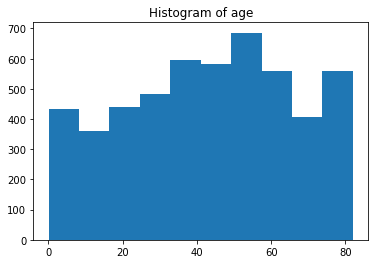

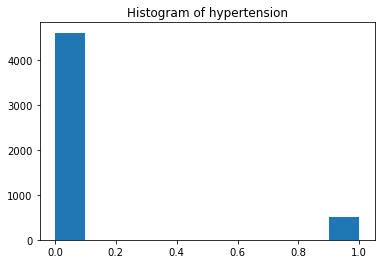

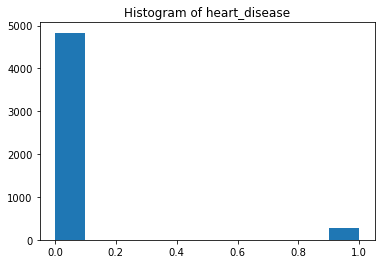

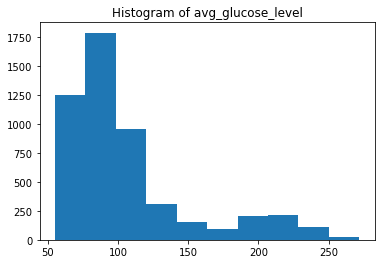

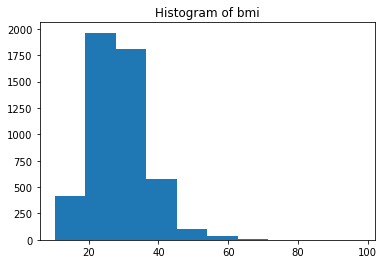

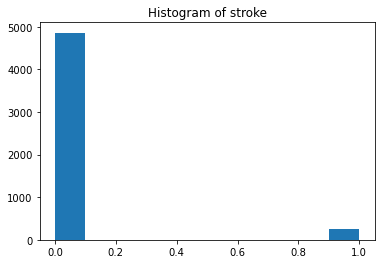

In [10]:
for numerical_feature in list_numerical_features:
    plt.title(f"Histogram of {numerical_feature}")
    plt.hist(df[numerical_feature])
    plt.show()

The distribution of avg_glucose_level looks left skewed. Let's later apply np.log scaling for this feature.

In [12]:
for cat_feature in list_categorical_features:
    print(df[cat_feature].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


Let's drop the row containing gender "Other" because only one value is available -> model will probably be overfitted to this one value and the according true label.

In [13]:
df = df.drop(index=df.loc[df["gender"] == "Other"].index)

In [14]:
df["gender"].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [15]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory Data Analysis

Let's start with some nice plots using seaborn to get even more insights into the relationships between the different features.

<AxesSubplot:xlabel='gender', ylabel='Count'>

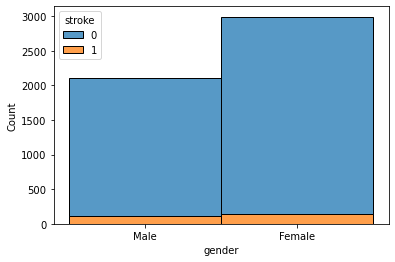

In [16]:
sns.histplot(data=df, x="gender", hue="stroke", multiple="stack")

<AxesSubplot:xlabel='age', ylabel='Count'>

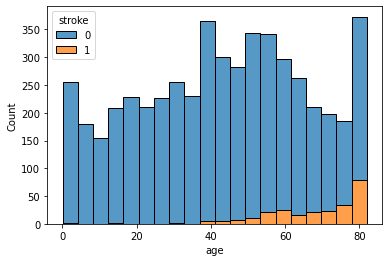

In [17]:
sns.histplot(data=df, x="age", hue="stroke", multiple="stack")

<AxesSubplot:xlabel='hypertension', ylabel='Count'>

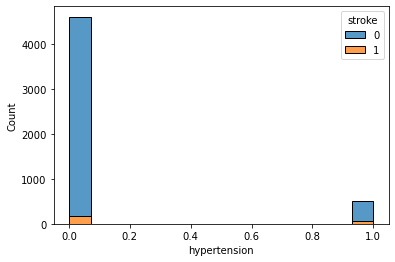

In [18]:
sns.histplot(data=df, x="hypertension", hue="stroke", multiple="stack")

<AxesSubplot:xlabel='heart_disease', ylabel='Count'>

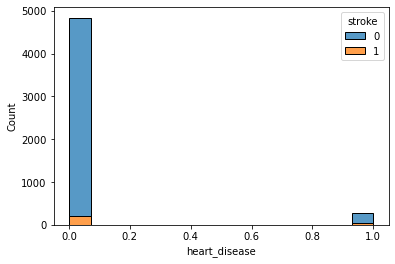

In [19]:
sns.histplot(data=df, x="heart_disease", hue="stroke", multiple="stack")

<AxesSubplot:xlabel='smoking_status', ylabel='Count'>

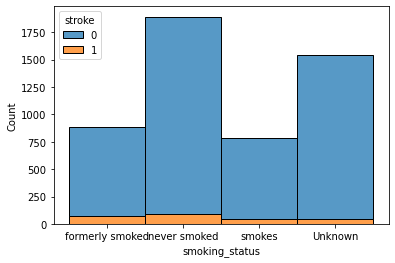

In [20]:
sns.histplot(data=df, x="smoking_status", hue="stroke", multiple="stack")

In [40]:
# get percentage of strokes per category
count_per_group_smoked_status = df.groupby("smoking_status").count()["stroke"]
count_stroke_per_group = df.loc[df["stroke"] == 1].groupby("smoking_status").count()["stroke"]
groups = count_per_group_smoked_status.index.to_list()
for idx, (count, group_count) in enumerate(zip(count_stroke_per_group, count_per_group_smoked_status)):
    print(f"Percentage of stroke cases in group {groups[idx]}: {100 * count / group_count}%")

Percentage of stroke cases in group Unknown: 3.0440414507772022%
Percentage of stroke cases in group formerly smoked: 7.918552036199095%
Percentage of stroke cases in group never smoked: 4.7568710359408035%
Percentage of stroke cases in group smokes: 5.32319391634981%


<AxesSubplot:xlabel='ever_married', ylabel='Count'>

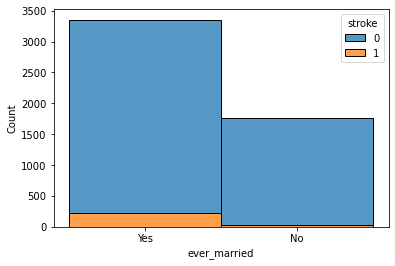

In [41]:
sns.histplot(data=df, x="ever_married", hue="stroke", multiple="stack")

In [42]:
# get percentage of strokes per category
count_per_group_married_status = df.groupby("ever_married").count()["stroke"]
count_stroke_per_group = df.loc[df["stroke"] == 1].groupby("ever_married").count()["stroke"]
groups = count_per_group_married_status.index.to_list()
for idx, (count, group_count) in enumerate(zip(count_stroke_per_group, count_per_group_married_status)):
    print(f"Percentage of stroke cases in group {groups[idx]}: {100 * count / group_count}%")

Percentage of stroke cases in group No: 1.6514806378132119%
Percentage of stroke cases in group Yes: 6.56128839844915%


<AxesSubplot:xlabel='work_type', ylabel='Count'>

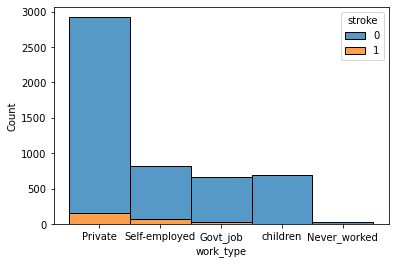

In [43]:
sns.histplot(data=df, x="work_type", hue="stroke", multiple="stack")

<AxesSubplot:xlabel='Residence_type', ylabel='Count'>

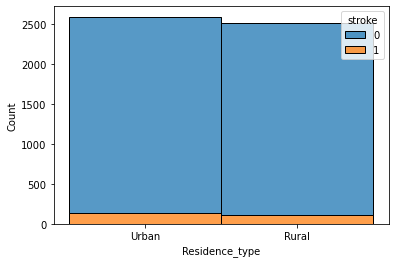

In [44]:
sns.histplot(data=df, x="Residence_type", hue="stroke", multiple="stack")

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

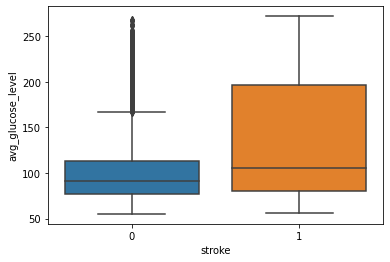

In [45]:
sns.boxplot(data=df, y="avg_glucose_level", x="stroke")

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

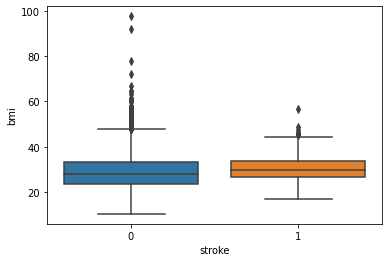

In [46]:
sns.boxplot(data=df, y="bmi", x="stroke")

Let's create the pairplot in order to get more insights into all features.

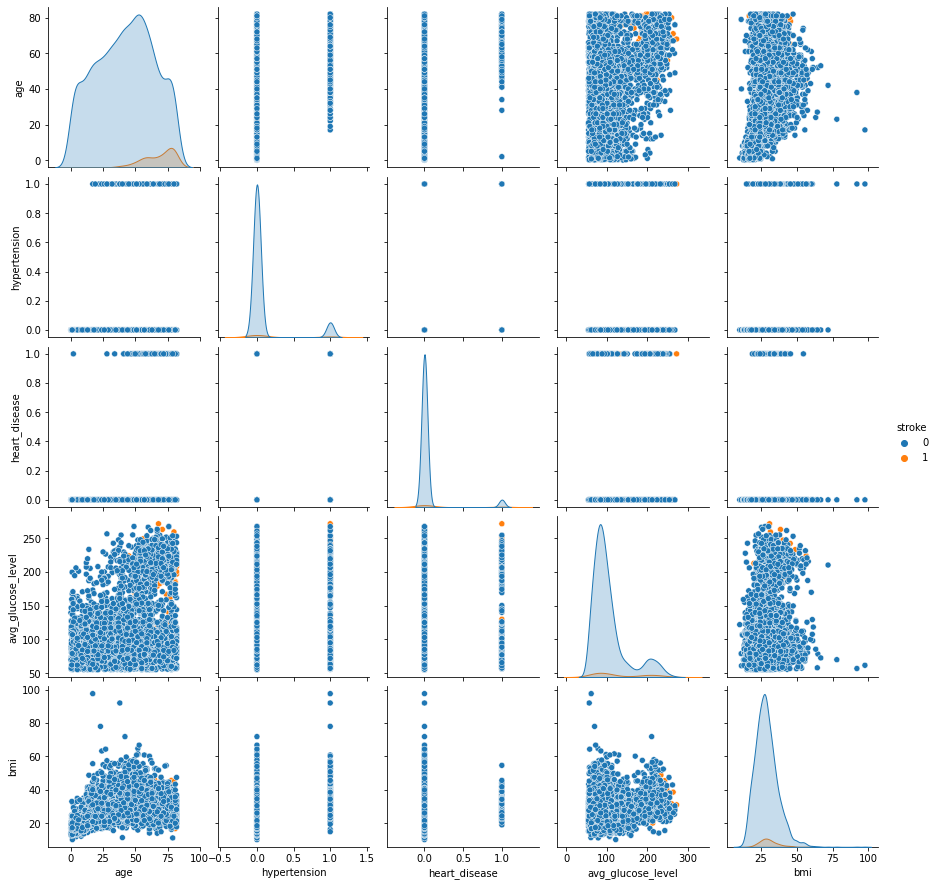

In [47]:
sns.pairplot(data=df, hue="stroke")

As last step of initial EDA: Lets plot the correlation heat map.

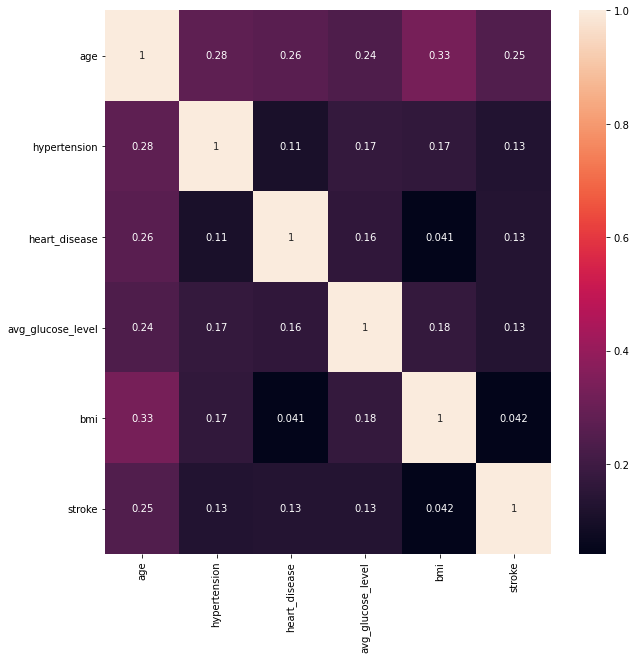

In [48]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Hypothesis Testing

Possible hypothesis:
1. Sample from feature age comes from normal distribution.
2. Feature gender does not influence stroke.
3. Feature smoking_status does not influence stroke.

In [51]:
# check if age comes from a normal distribution -> null hypothesis: sample comes from normal distribution
import scipy
alpha = 0.05 
_, p = scipy.stats.normaltest(df["age"].to_numpy())

if p < alpha:
    print("The null hypothesis can be rejected.")
else:
    print("The null hypothesis cannot be rejected.")

The null hypothesis can be rejected.


# Feature Engineering

Now: Lets apply feature engineering using the following steps:
1. Create dummies for categorical features.
2. Apply log scaling on avg_glucose_level.
3. Split data into train-test.
4. Impute missing data for age using train data.
5. Normalize data.

In [27]:
# transform gender column to have a 0 for female and a 1 for male
df["gender"] = df["gender"].apply(lambda x: 1 if x == "Male" else 0)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [28]:
# transform column ever married to 1 if yes else to zero
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x == "Yes" else 0)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,1,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1


In [29]:
# create dummies
df_one_hot_encoded = pd.get_dummies(df)
df_one_hot_encoded.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,1,0,0
1,0,61.0,0,0,1,202.21,NaN,1,0,0,0,1,0,1,0,0,0,1,0
2,1,80.0,0,1,1,105.92,32.5,1,0,0,1,0,0,1,0,0,0,1,0
3,0,49.0,0,0,1,171.23,34.4,1,0,0,1,0,0,0,1,0,0,0,1
4,0,79.0,1,0,1,174.12,24.0,1,0,0,0,1,0,1,0,0,0,1,0


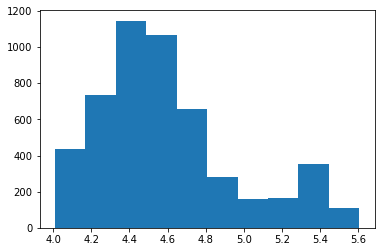

In [30]:
df_one_hot_encoded["avg_glucose_level"] = np.log(df_one_hot_encoded["avg_glucose_level"])
plt.hist(df_one_hot_encoded["avg_glucose_level"])
plt.show()

In [31]:
final_features_list = df_one_hot_encoded.drop(columns="stroke").columns
final_features_list

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [51]:
# create train-test-split
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_one_hot_encoded, test_size=0.3)

num_samples_train = df_train.shape[0]
num_samples_test = df_test.shape[0]

count_stroke_train = df_train.loc[df_train["stroke"] == 1].shape[0]
count_stroke_test = df_test.loc[df_test["stroke"] == 1].shape[0]

print(f"Num samples in train-set: {df_train.shape[0]}")
print(f"Num samples in test-set: {df_test.shape[0]}")

print(f"There are {count_stroke_train} samples of class 'stroke' in train-set. This makes {100 * (count_stroke_train / num_samples_train)}% of all data.")
print(f"There are {count_stroke_test} samples of class 'stroke' in test-set. This makes {100 * (count_stroke_test / num_samples_test)}% of all data.")

Num samples in train-set: 3576
Num samples in test-set: 1533
There are 179 samples of class 'stroke' in train-set. This makes 5.005592841163311% of all data.
There are 70 samples of class 'stroke' in test-set. This makes 4.5662100456621% of all data.


In [52]:
X_train = df_train.drop(columns="stroke").to_numpy()
y_train = df_train["stroke"].to_numpy()

X_test = df_test.drop(columns="stroke").to_numpy()
y_test = df_test["stroke"].to_numpy()

In [53]:
# use sklearn-iterative imputer to impute missing data on feature Age.
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=0)

imputer.fit(X_train, y_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [54]:
# last step: apply normalization to data
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(X_train)

X_train_normalized = transformer.transform(X_train)
X_test_normalized = transformer.transform(X_test)

In [55]:
np.max(X_train_normalized, axis=0)

array([0.07234803, 0.98813435, 0.02675949, 0.03351046, 0.03443672,
       0.41548334, 0.98713852, 0.04071167, 0.04963494, 0.05006699,
       0.04836429, 0.08648068, 0.08648068, 0.07354986, 0.08648068,
       0.04925782, 0.04963178, 0.04297644])

In [56]:
np.max(X_test_normalized, axis=0)

array([0.06914811, 0.9769452 , 0.02858838, 0.02916044, 0.0347413 ,
       0.31412542, 0.98953065, 0.03558303, 0.04363427, 0.04592799,
       0.03786311, 0.07052109, 0.06390665, 0.07052109, 0.07052109,
       0.04620318, 0.0529593 , 0.03710042])

# Store Transformed Data into new csv Files

In [59]:
df_train_final = pd.concat([pd.DataFrame(y_train, columns=["stroke"]), pd.DataFrame(X_train, columns=final_features_list)], axis=1)
df_train_final.head()

,stroke,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1.0,76.0,1.0,0.0,1.0,4.383900,34.900000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,1.0,21.0,0.0,0.0,0.0,4.141705,26.200000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0,0.0,30.0,0.0,0.0,1.0,4.734882,34.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,0.0,51.0,0.0,0.0,1.0,4.422449,34.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0,0.0,30.0,0.0,0.0,0.0,4.479607,29.009967,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [60]:
df_test_final = pd.concat([pd.DataFrame(y_test, columns=["stroke"]), pd.DataFrame(X_test, columns=final_features_list)], axis=1)
df_test_final.head()

,stroke,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,0.0,67.0,0.0,0.0,1.0,4.606769,31.8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0,0.0,37.0,0.0,0.0,0.0,4.718677,29.1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0,0.0,80.0,0.0,0.0,1.0,4.318288,29.7,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0,0.0,0.4,0.0,0.0,0.0,4.450269,17.4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0.0,2.0,0.0,0.0,0.0,4.837234,24.8,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [64]:
# check that targets still match
num_samples_train = df_train_final.shape[0]
num_samples_test = df_test_final.shape[0]

count_stroke_train = df_train_final.loc[df_train_final["stroke"] == 1].shape[0]
count_stroke_test = df_test_final.loc[df_test_final["stroke"] == 1].shape[0]

print(f"Num samples in train-set: {df_train_final.shape[0]}")
print(f"Num samples in test-set: {df_test_final.shape[0]}")

print(f"There are {count_stroke_train} samples of class 'stroke' in train-set. This makes {100 * (count_stroke_train / num_samples_train)}% of all data.")
print(f"There are {count_stroke_test} samples of class 'stroke' in test-set. This makes {100 * (count_stroke_test / num_samples_test)}% of all data.")

Num samples in train-set: 3576
Num samples in test-set: 1533
There are 179 samples of class 'stroke' in train-set. This makes 5.005592841163311% of all data.
There are 70 samples of class 'stroke' in test-set. This makes 4.5662100456621% of all data.


In [66]:
# create csv files
train_filepath = r"data\train.csv"
test_filepath = r"data\test.csv"

df_train_final.to_csv(train_filepath, index=False)
df_test_final.to_csv(test_filepath, index=False)